In [1]:
import pandas as pd
import pylab
import seaborn as sns
import numpy as np
import datetime

In [2]:
df = pd.read_csv("../data/temps.csv")
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [3]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Everything from 2016. Looks like missing some days from August; otherwise most months have good coverage

In [4]:
for month in range(1,13):
    print((month, len(df[df["month"]==month]['day'].unique())))

(1, 31)
(2, 26)
(3, 31)
(4, 30)
(5, 31)
(6, 30)
(7, 31)
(8, 19)
(9, 28)
(10, 30)
(11, 30)
(12, 31)


Similarly, weekdays have good coverage and naming

In [5]:
for weekday in df["week"].unique():
    print((weekday, len(df[df["week"]==weekday])))

('Fri', 50)
('Sat', 50)
('Sun', 49)
('Mon', 49)
('Tues', 52)
('Wed', 49)
('Thurs', 49)


### Scatter plots

Looks like the temperatures are in Farenheit. Temp_1 and Temp_2 are tightly bound to actual, although show some outliers. Average looks like a moving average of the data. Forecasts are heavily discretized. Friend looks like the average with a load of random noise on top.

<AxesSubplot:ylabel='temp_1'>

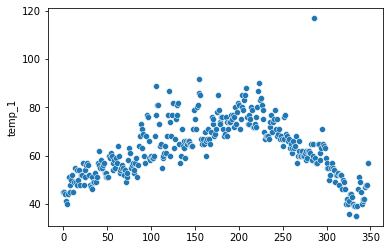

In [6]:
sns.scatterplot(data=df, x=range(348), y="temp_1")

<AxesSubplot:ylabel='temp_2'>

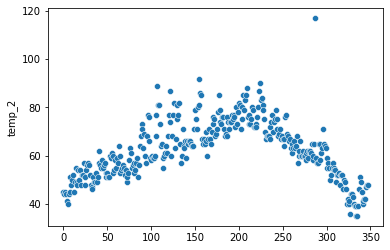

In [7]:
sns.scatterplot(data=df, x=range(348), y="temp_2")

Correct for outliers in temp_1 ad temp_2

In [8]:
df[df["temp_1"]>100]

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
286,2016,10,31,Mon,65,117,54.8,59,51,59,56,62


In [9]:
df[df["temp_2"]>100]

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
287,2016,11,1,Tues,117,59,54.5,57,51,59,55,61


In [10]:
df.iloc[287, 4] = df.iloc[286, 4]
df.iloc[286, 5] = df.iloc[285, 5]

<AxesSubplot:ylabel='temp_1'>

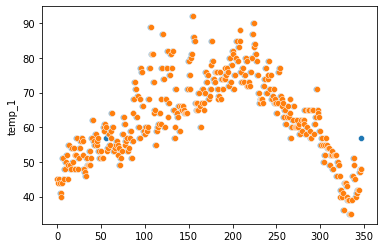

In [11]:
sns.scatterplot(data=df, x=range(348), y="temp_1")
sns.scatterplot(data=df, x=range(348), y="temp_2")

<AxesSubplot:ylabel='temp_1'>

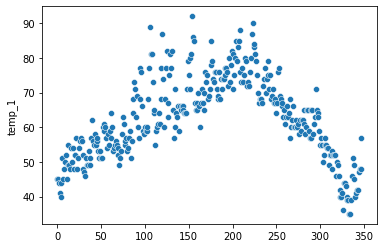

In [12]:
sns.scatterplot(data=df, x=range(348), y="temp_1")

<AxesSubplot:ylabel='average'>

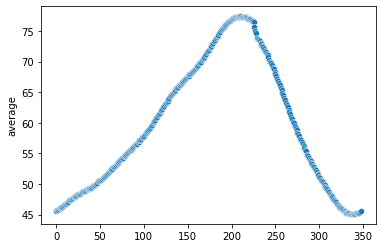

In [13]:
sns.scatterplot(data=df, x=range(348), y="average")

<AxesSubplot:ylabel='actual'>

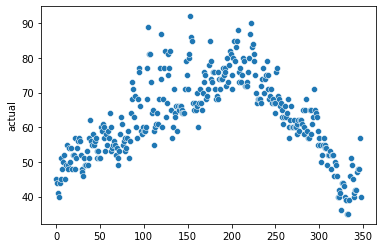

In [14]:
sns.scatterplot(data=df, x=range(348), y="actual")

<AxesSubplot:ylabel='forecast_noaa'>

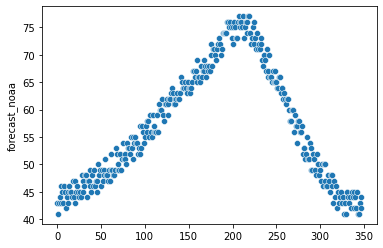

In [15]:
sns.scatterplot(data=df, x=range(348), y="forecast_noaa")

<AxesSubplot:ylabel='forecast_acc'>

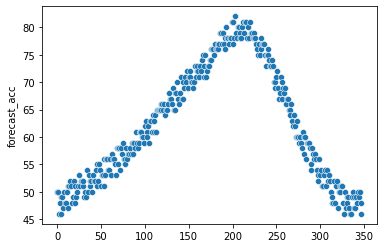

In [16]:
sns.scatterplot(data=df, x=range(348), y="forecast_acc")

<AxesSubplot:ylabel='forecast_under'>

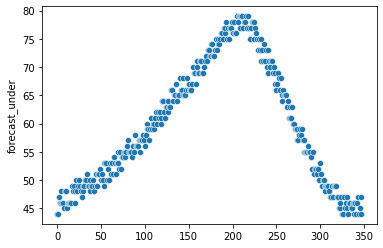

In [17]:
sns.scatterplot(data=df, x=range(348), y="forecast_under")

<AxesSubplot:ylabel='friend'>

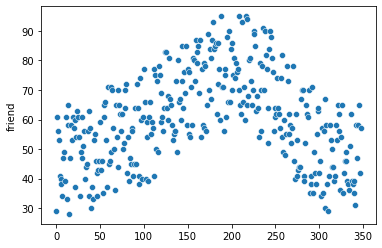

In [18]:
sns.scatterplot(data=df, x=range(348), y="friend")

### Correlations

<AxesSubplot:>

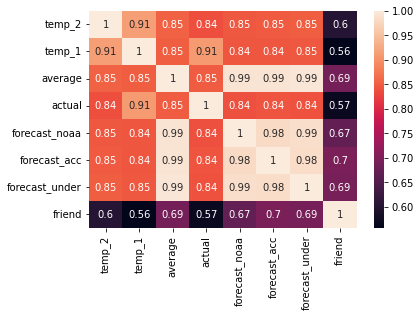

In [19]:
corr_mat = df[["temp_2","temp_1","average","actual","forecast_noaa","forecast_acc","forecast_under","friend"]].corr()
sns.heatmap(corr_mat, annot = True)

### Encoding of vars

In [20]:
df.iloc[287, 4] = df.iloc[286, 4]
df.iloc[286, 5] = df.iloc[285, 5]

df_enc = pd.get_dummies(df)
df_enc.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [21]:
(datetime.date(year=2016, month=1, day=1) - datetime.date(year=1, month=1, day=1)).days

735963

In [22]:
unix_days = []
for _, row in df_enc.iterrows():
    unix_days.append((datetime.date(year=int(row["year"]), month=int(row["month"]), day=int(row["day"])) - datetime.date(year=1, month=1, day=1)).days)
df_enc["unix_days"] = unix_days    


In [23]:
df_enc = df_enc.drop(columns=["year", "month", "day"])


In [24]:
df_enc.head()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed,unix_days
0,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0,735963
1,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0,735964
2,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0,735965
3,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0,735966
4,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0,735967


### Custom get clean data function

In [25]:
import get_data
df_clean = get_data.get_data()
df_clean.head()

,month,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed,unix_days
0,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0,735963
1,1,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0,735964
2,1,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0,735965
3,1,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0,735966
4,1,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0,735967
